# H1N1 Vaccine Prediction

## Business Understanding

### Problem Statement

In 2009, influenza A virus subtype H1N1 (A/H1N1) emerged and spread globally, causing a global pandemic. It contributed to an estimated 151,000 to 575,000 deaths worldwide, or 24% of the global population during the first year it circulated. Till date, the virus continues to circulate seasonally, resulting in 3 to 5 million cases of severe illness and about 290,000 to 650,000 respiratory deaths. 

Vaccines are a key public health measure used to fight infectious diseases like COVID-19. They provide immunization for individuals, and enough immunization in a community can further reduce the spread of diseases through "herd immunity." However, the successes of immunisation programmes are moderated by the level of vaccine uptake in the population. 

The Ministry of Health realised there is a low vaccine uptake in the population,they seek to understand some of the factors that influence the uptake of vaccines,and how they can improve vaccine uptake in future vaccine campaigns.

Vaccines for H1N1 were first publicly available in the United States in October 2009, when the United States government began a vaccination campaign. We will look at data from the National 2009 H1N1 Flu Survey collected to monitor vaccination rates during that campaign. This phone survey asked people whether they had received H1N1 and seasonal flu vaccines, in conjunction with information they shared about their lives, opinions, and behaviors. A better understanding of how these characteristics have been associated with personal vaccination patterns may provide guidance for the Ministry of Health for future vaccination campaigns.

This project will only focus on the H1N1 vaccine,thus the aim is to build a classification model to predict how likely individuals are to receive the H1N1 vaccine.

### Objectives

* Identify which factors influence the uptake of vaccines

* Build a classification model to predict how likely individuals are to receive the H1N1 vaccine

## Data Understanding

The dataset is from National 2009 H1N1 Flu Survey (NHFS), conducted on behalf of the Centres for Disease Control and Prevention (CDC). The survey was conducted by telephone with households in all 50 states and District of Columbia, between October 2009 and June 2010. It was designed specifically to monitor vaccination during the 2009 to 2010 flu season in response to 2009 H1N1 pandemic.

Two datasets were provided,Training features and Training labels

__1. Training Features:__ These are the input variables that the model will use to predict the probability that people received H1N1 flu and seasonal flu vaccines. There are 36 columns in total, each a response to a survey question. These questions cover several different topics, such as whether people observed safe behavioral practices, their opinions about the diseases and the vaccines, and their demographics.

The features are:

The first column __respondent_id__ is a unique and random identifier. The remaining 35 features are described below.

For all binary variables: 0 = No; 1 = Yes.

* h1n1_concern - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

* h1n1_knowledge - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

* behavioral_antiviral_meds - Has taken antiviral medications. (binary)

* behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)

* behavioral_face_mask - Has bought a face mask. (binary)

* behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)

* behavioral_large_gatherings - Has reduced time at large gatherings. (binary)

* behavioral_outside_home - Has reduced contact with people outside of own household. (binary)

* behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)

* doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)

* doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)

* chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)

* child_under_6_months - Has regular close contact with a child under the age of six months. (binary)

* health_worker - Is a healthcare worker. (binary)

* health_insurance - Has health insurance. (binary)

* opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

* opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

* opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

* opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

* opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

* opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

* age_group - Age group of respondent.

* education - Self-reported education level.

* race - Race of respondent.

* sex - Sex of respondent.

* income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.

* marital_status - Marital status of respondent.

* rent_or_own - Housing situation of respondent.

* employment_status - Employment status of respondent.

* hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.

* census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.

* household_adults - Number of other adults in household, top-coded to 3.

* household_children - Number of children in household, top-coded to 3.

* employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.

* employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

__2. Training Labels:__ These are the labels corresponding to the observations in the training features. There are two target variables: h1n1_vaccine and seasonal_vaccine. Both are binary variables, with 1 indicating that a person received the respective flu vaccine and 0 indicating that a person did not receive the respective flu vaccine.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder, StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier


from sklearn.metrics import  confusion_matrix, accuracy_score, f1_score,roc_curve, \
precision_score, recall_score, roc_auc_score, classification_report, plot_confusion_matrix



from imblearn.over_sampling import SMOTE

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')

# set random state
random_state = 0

### Loading the Data

In [2]:
#Create a function to load the data
def open_files (file_path):
    df = pd.read_csv(file_path, delimiter= ',',index_col= 0 )
    return df

In [3]:
# Loading the training features
Features = open_files("/home/elsie/Downloads/training_set_features.csv")
Features

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN


In [4]:
# Loding the labels
labels = open_files("/home/elsie/Downloads/training_set_labels.csv")
labels

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
26702,0,0
26703,0,0
26704,0,1


In [5]:
#Assertaining that the labels data set and feature data set have equal rows
np.testing.assert_array_equal(Features.index.values, labels.index.values)

In [6]:
# Joining the two dataset to form one dataframe
raw_df = Features.join(labels)
raw_df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1


In [7]:
#Checking the info
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

### Data Preparation

In [8]:
# Since I will be focusing on H1N1 vaccine as my target variable
def drop_columns(data,column_names):
    df = data.drop(column_names,axis = 1,inplace = True)

    return df


In [9]:
#Checking for missing values
raw_df.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [10]:
#Getting names of columns with missing values
columns_missing = [col for col in raw_df.columns if raw_df[col].isnull().any()]
columns_missing

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'education',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'household_adults',
 'household_children',
 'employment_industry',
 'employment_occupation']

In [11]:
print(len(columns_missing))

30


* Out of the 37 columns we have 30 of them with missing values

In [12]:
#Getting percentage of missing values per column
for col in columns_missing:
    missing = ((raw_df[col].isna().sum()/len(raw_df[col])))*100
    print(f"{col}:{round(missing,2)}")

h1n1_concern:0.34
h1n1_knowledge:0.43
behavioral_antiviral_meds:0.27
behavioral_avoidance:0.78
behavioral_face_mask:0.07
behavioral_wash_hands:0.16
behavioral_large_gatherings:0.33
behavioral_outside_home:0.31
behavioral_touch_face:0.48
doctor_recc_h1n1:8.09
doctor_recc_seasonal:8.09
chronic_med_condition:3.64
child_under_6_months:3.07
health_worker:3.01
health_insurance:45.96
opinion_h1n1_vacc_effective:1.46
opinion_h1n1_risk:1.45
opinion_h1n1_sick_from_vacc:1.48
opinion_seas_vacc_effective:1.73
opinion_seas_risk:1.92
opinion_seas_sick_from_vacc:2.01
education:5.27
income_poverty:16.56
marital_status:5.27
rent_or_own:7.65
employment_status:5.48
household_adults:0.93
household_children:0.93
employment_industry:49.91
employment_occupation:50.44


Most of the columns with missing values have missing values less than 20% of the data,only 3 columns have values more than 20% of missing data

These are:

health_insurance:45.96%

employment_industry:49.91%

employment_occupation:50.44%




With the columns less than 20% of missing data I will replace the missing values with the mode

In [13]:
df = raw_df.copy()

In [14]:
#Function to count values
def count_val (data,column):
    values = data[column].value_counts()

    return values    


In [16]:
#Column to replace with missing values less than 20 percent
col_to_replace = ['h1n1_concern',
'h1n1_knowledge',
'behavioral_antiviral_meds',
'behavioral_avoidance',
'behavioral_face_mask',
'behavioral_wash_hands',
'behavioral_large_gatherings',
'behavioral_outside_home',
'behavioral_touch_face',
'doctor_recc_h1n1',
'doctor_recc_seasonal',
'chronic_med_condition',
'child_under_6_months',
'health_worker',
'opinion_h1n1_vacc_effective',
'opinion_h1n1_risk',
'opinion_h1n1_sick_from_vacc',
'opinion_seas_vacc_effective',
'opinion_seas_risk',
'opinion_seas_sick_from_vacc',
'education',
'income_poverty',
'marital_status',
'rent_or_own',
'employment_status',
'household_adults',
'household_children']
for col in col_to_replace:
    df[col].fillna(df[col].mode()[0],inplace = True)

In [17]:
df.isna().sum()

h1n1_concern                       0
h1n1_knowledge                     0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                   0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance               12274
opinion_h1n1_vacc_effective        0
opinion_h1n1_risk                  0
opinion_h1n1_sick_from_vacc        0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                          0
race                               0
sex                                0
income_poverty                     0
marital_status                     0
r

In [18]:
#Further investigation on the three columns with large percentage of missing data
print(count_val(df,'employment_industry'))

fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: employment_industry, dtype: int64


In [19]:
print(count_val(df,'employment_occupation'))

xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
hfxkjkmi     766
qxajmpny     548
xqwwgdyp     485
kldqjyjy     469
uqqtjvyb     452
tfqavkke     388
ukymxvdu     372
vlluhbov     354
oijqvulv     344
ccgxvspp     341
bxpfxfdn     331
haliazsg     296
rcertsgn     276
xzmlyyjv     248
dlvbwzss     227
hodpvpew     208
dcjcmpih     148
pvmttkik      98
Name: employment_occupation, dtype: int64


In [20]:
# dropping employment occupation and employment industry because the meaning of the values aint clear
drop_columns(df,'employment_industry')

drop_columns(df,'employment_occupation')


In [21]:
df.isna().sum()

h1n1_concern                       0
h1n1_knowledge                     0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                   0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance               12274
opinion_h1n1_vacc_effective        0
opinion_h1n1_risk                  0
opinion_h1n1_sick_from_vacc        0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                          0
race                               0
sex                                0
income_poverty                     0
marital_status                     0
r

In [22]:
print(count_val(df,'health_insurance'))

1.0    12697
0.0     1736
Name: health_insurance, dtype: int64


The health insurance column is binary indicating whether someone has insurance or not,I will assume the missing values indicate the absence of someone having health insurance

In [23]:
#Replacing the health insurance column with 0
df['health_insurance'] = df['health_insurance'].replace(np.nan,0)

df.isnull().any()

h1n1_concern                   False
h1n1_knowledge                 False
behavioral_antiviral_meds      False
behavioral_avoidance           False
behavioral_face_mask           False
behavioral_wash_hands          False
behavioral_large_gatherings    False
behavioral_outside_home        False
behavioral_touch_face          False
doctor_recc_h1n1               False
doctor_recc_seasonal           False
chronic_med_condition          False
child_under_6_months           False
health_worker                  False
health_insurance               False
opinion_h1n1_vacc_effective    False
opinion_h1n1_risk              False
opinion_h1n1_sick_from_vacc    False
opinion_seas_vacc_effective    False
opinion_seas_risk              False
opinion_seas_sick_from_vacc    False
age_group                      False
education                      False
race                           False
sex                            False
income_poverty                 False
marital_status                 False
r

In [24]:
print(count_val(df,'health_insurance'))

0.0    14010
1.0    12697
Name: health_insurance, dtype: int64


In [25]:
# droping the respondent ID too since its a unique identifier
df = df.reset_index(drop=True)

In [26]:
drop_columns(df,'hhs_geo_region')
# The meaning of the values are not clear

In [27]:
pd.set_option("display.max_columns", 30)
df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,...,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0,1
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0,0


In [28]:
#Checking the column datatypes
df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [29]:
#Converting all the column with numbers to int
for col in df.columns:
    if(df[col].dtypes == 'float64'):
        df[col] = df[col].astype(int)

df.dtypes

h1n1_concern                    int64
h1n1_knowledge                  int64
behavioral_antiviral_meds       int64
behavioral_avoidance            int64
behavioral_face_mask            int64
behavioral_wash_hands           int64
behavioral_large_gatherings     int64
behavioral_outside_home         int64
behavioral_touch_face           int64
doctor_recc_h1n1                int64
doctor_recc_seasonal            int64
chronic_med_condition           int64
child_under_6_months            int64
health_worker                   int64
health_insurance                int64
opinion_h1n1_vacc_effective     int64
opinion_h1n1_risk               int64
opinion_h1n1_sick_from_vacc     int64
opinion_seas_vacc_effective     int64
opinion_seas_risk               int64
opinion_seas_sick_from_vacc     int64
age_group                      object
education                      object
race                           object
sex                            object
income_poverty                 object
marital_stat

In [30]:
#Checking for duplicates
df.duplicated().value_counts()

False    26701
True         6
dtype: int64

In [31]:
#Dropping duplicates
df.drop_duplicates(inplace=True)

### Exploratory Data Analysis

#### Univariate analysis


In [32]:
df.shape

(26701, 34)

In [33]:
# Getting the value counts of the target variable
df['h1n1_vaccine'].value_counts(normalize = True)

0    0.787499
1    0.212501
Name: h1n1_vaccine, dtype: float64

In [34]:
#Separating target from fearures
target = df['h1n1_vaccine']

features = df.drop('h1n1_vaccine',axis = 1)

features

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,...,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,seasonal_vaccine
0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,...,2,1,2,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0,0,0
1,3,2,0,1,0,1,0,1,1,0,0,0,0,0,1,...,4,2,4,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0,0,1
2,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,...,4,1,2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2,0,0
3,1,1,0,1,0,1,1,0,0,0,1,1,0,0,0,...,5,4,1,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0,0,1
4,2,1,0,1,0,1,1,0,1,0,0,0,0,0,0,...,3,1,4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,5,2,2,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0,0,0
26703,1,2,0,1,0,1,0,0,0,1,1,0,0,1,1,...,5,1,1,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1,0,0
26704,2,2,0,1,1,1,1,0,1,0,0,0,0,0,0,...,5,4,2,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0,0,1
26705,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,2,1,2,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1,0,0


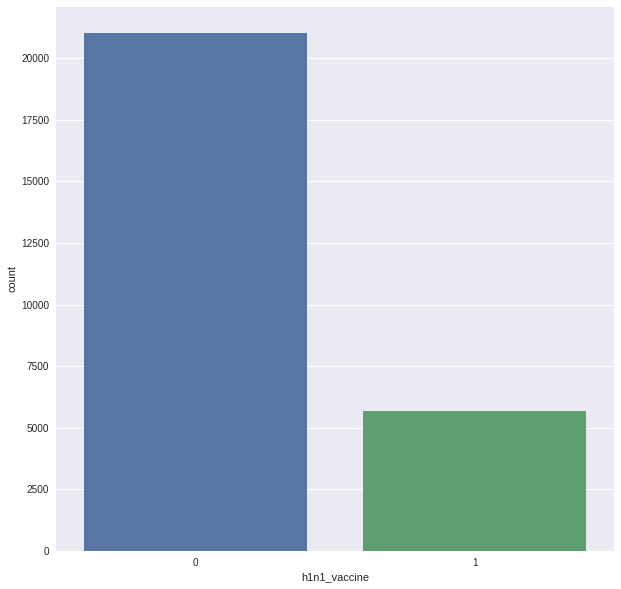

In [35]:
#Plotting a bar plot to visualize the target column
fig,ax = plt.subplots(figsize = (10,10))

ax = sns.countplot(x = target, data = df)

Clearly there is class imbalance in the target variable,78.7% of those who took the survey did not receive the H1N1 vaccine

In [36]:
columns = features.columns

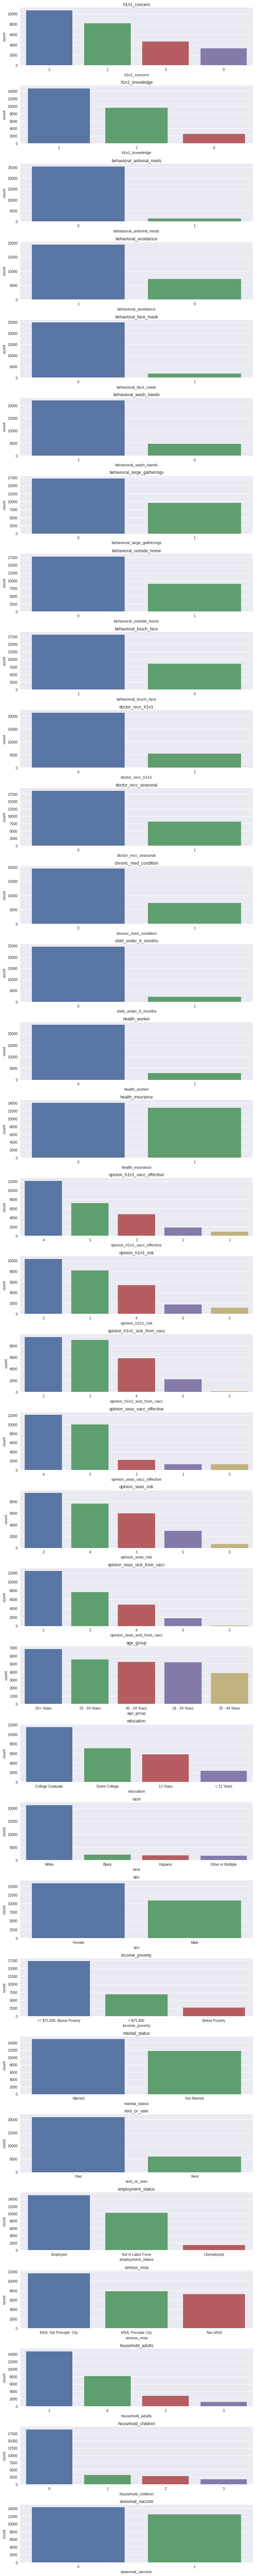

In [37]:
# Plotting the ditribution of all the columns
def plot_countplot (df,list_names):
    fig,ax=plt.subplots(len(list_names),figsize=(10,100))
    fig.set_tight_layout(True)
    for i,cols in enumerate(list_names):
        sns.countplot(df[cols],order=df[cols].value_counts().index,ax=ax[i]) 
        ax[i].set_title("{}".format(cols))

plot_countplot(features,columns)    

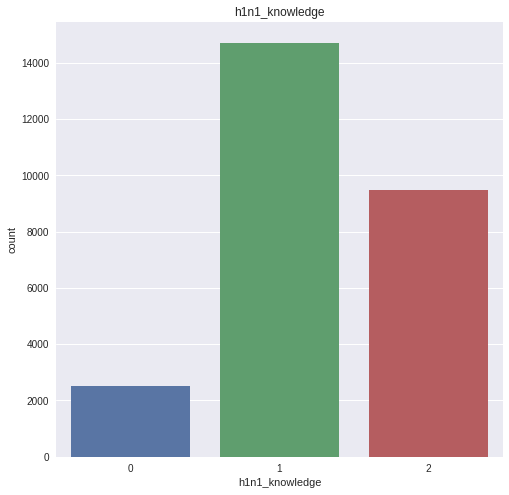

In [92]:
def count_plot(X):
    fig,ax = plt.subplots(figsize = (8,8))
    ax = sns.countplot(X,data=df)
    ax.set_title("{}".format(X))

count_plot('h1n1_knowledge') 
plt.savefig("h1n1_knowledge")


From the above plot we see most of the people who took part in the survey:
* Were females

* were above 65 years of age.

* Had a little knowledge of H1N1 flu

* Thought the vaccine was somewhat effective

* Felt they were at a low risk of getting the flu

* Were not very worried they could get sick from the vaccine

* Were above income poverty

* Were employed
* Were whites

#### Univariate avalysis

Relationship between the features and the target variable

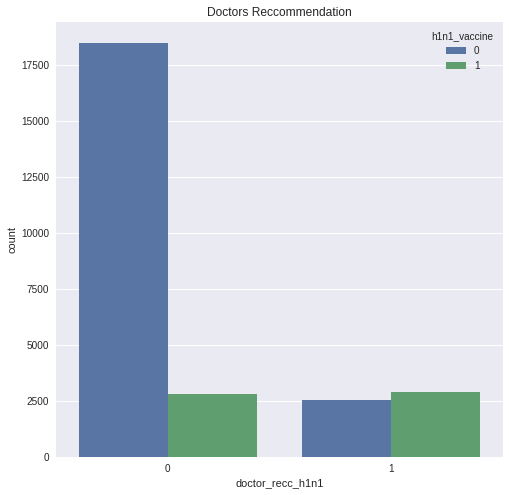

In [93]:
def compare(X,title):
    fig,ax = plt.subplots(figsize = (8,8))
    ax = sns.countplot(x = X,data = features,hue=target)
    ax.set_title("{}".format(title))
    plt.savefig("{}".format(title))

compare('doctor_recc_h1n1',"Doctors Reccommendation")    



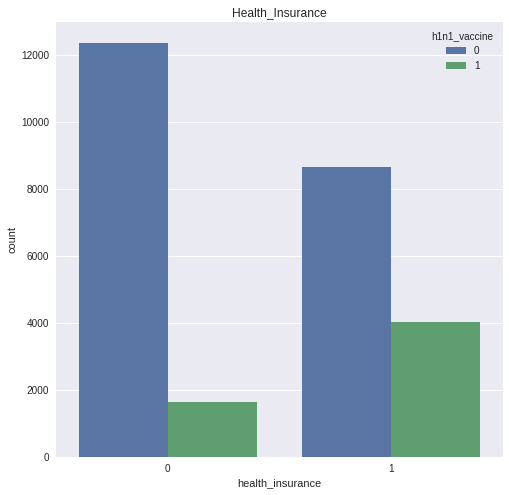

In [94]:
compare("health_insurance","Health_Insurance")

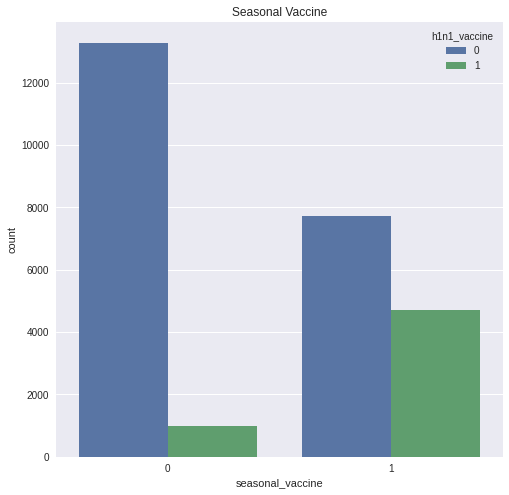

In [95]:
compare('seasonal_vaccine',"Seasonal Vaccine")

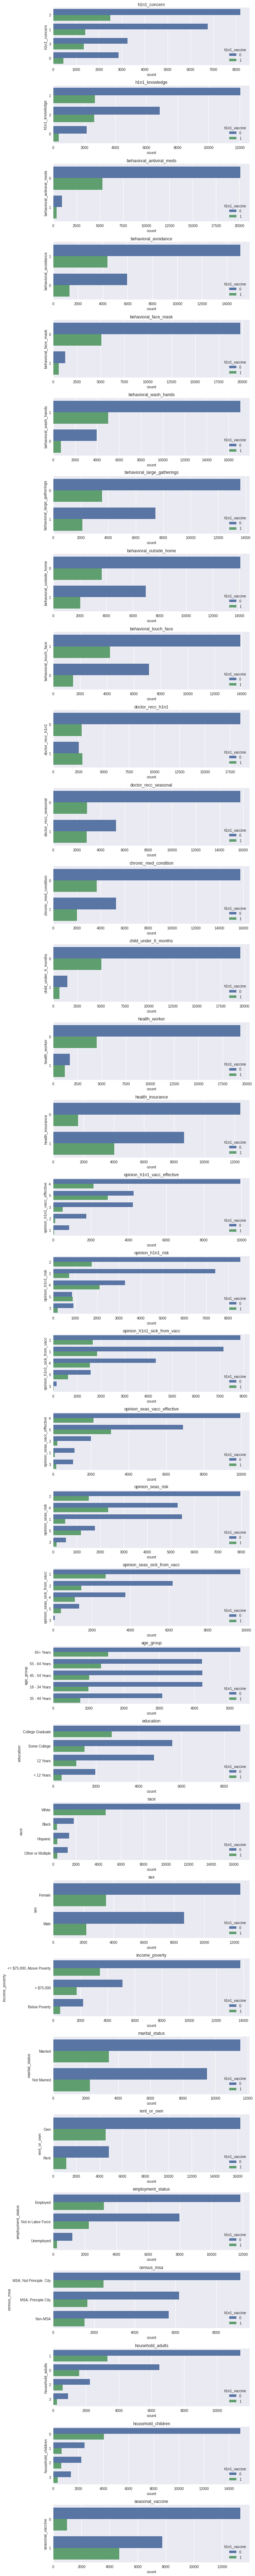

In [42]:
def comparison(df,list_names):
    fig,ax=plt.subplots(len(list_names),figsize=(10,100))
    fig.set_tight_layout(True)
    for i,cols in enumerate(list_names):
        sns.countplot(y = df[cols],order=df[cols].value_counts().index,ax=ax[i],hue = target) 
        ax[i].set_title("{}".format(cols))

comparison(features,columns) 

From the above plot we see that:
* Most people who received the seasonal vaccine also received the h1n1_vaccine
* Most people who too the vaccine had knowledge about the H1N1 flu
* Those people who were some how concerned about getting the flu took the vaccine more than those who were very concerned
* Those people who were recomended by the doctor took the vaccine more than those who were not
* Those people who had health insurance took the vaccine
* Most people who took the vaccine were females
* Most people who took the vaccine were those who believed it was very effective and were at high risk of getting the flu without a vaccine
* Most people who took the vaccine were not worried about getting sick from it,followed closely by those who were somehow worried
* Most people who took the vaccine were above 65 years of age,whites and college graduates

#### Multivariate analysis

In [43]:
# Encoding categorical features to numeric
transformed = df.copy()
le = LabelEncoder()
for col in transformed.columns:
    if(transformed[col].dtypes == 'object'):
        transformed[col] = le.fit_transform(transformed[col].values)

transformed

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,...,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,...,1,2,3,1,3,0,2,1,0,1,2,0,0,0,0
1,3,2,0,1,0,1,0,1,1,0,0,0,0,0,1,...,2,4,1,0,3,1,2,1,1,0,0,0,0,0,1
2,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,...,1,2,0,2,3,1,0,1,0,0,0,2,0,0,0
3,1,1,0,1,0,1,1,0,0,0,1,1,0,0,0,...,4,1,4,0,3,0,2,1,1,1,1,0,0,0,1
4,2,1,0,1,0,1,1,0,1,0,0,0,0,0,0,...,1,4,2,3,3,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,2,2,4,3,3,0,0,1,0,1,2,0,0,0,0
26703,1,2,0,1,0,1,0,0,0,1,1,0,0,1,1,...,1,1,0,2,3,1,0,1,1,0,1,1,0,0,0
26704,2,2,0,1,1,1,1,0,1,0,0,0,0,0,0,...,4,2,3,3,3,0,0,1,0,0,0,0,0,0,1
26705,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,2,0,3,1,0,0,0,1,0,2,1,0,0,0


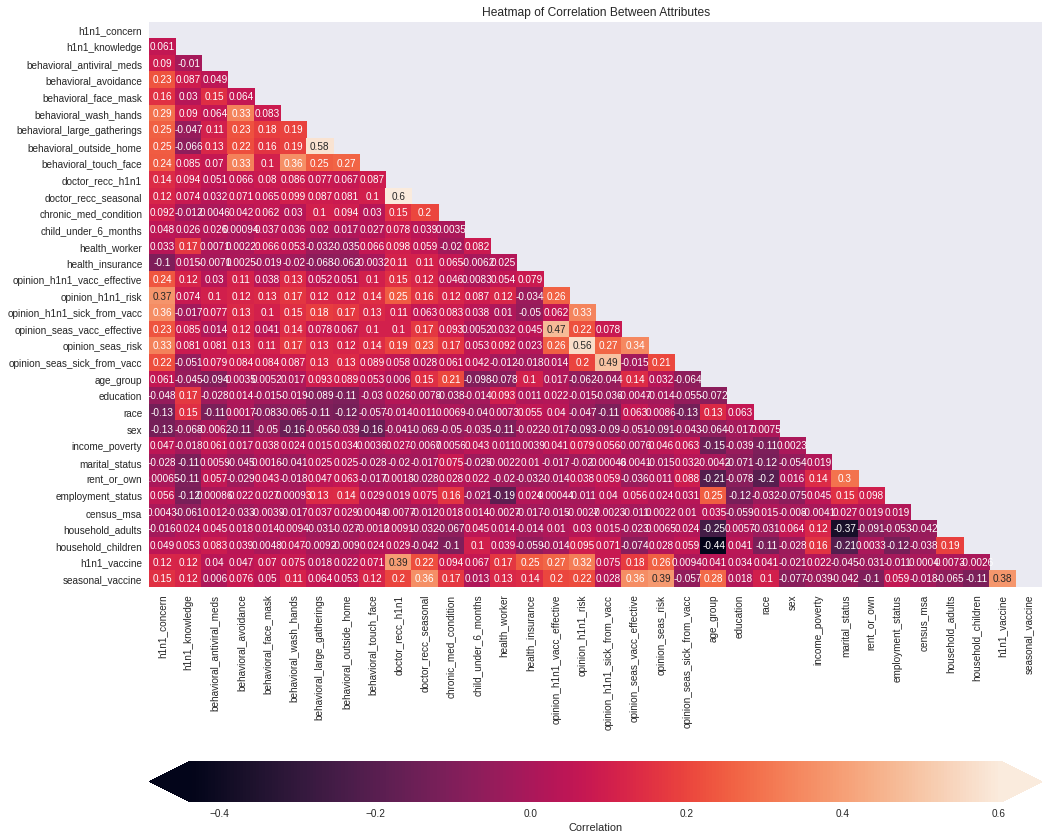

In [44]:
#Checking correlation between attributes
#Building a heatmap to show the correlation
def correlation(Data):
    corr = Data.corr()
    fig, ax = plt.subplots(figsize=(16, 16))

    sns.heatmap(
        data=corr,
        # The mask means we only show half the values, instead of showing duplicates
        mask=np.triu(np.ones_like(corr, dtype=bool)),
        ax=ax,
        # Specifies that we want labels, not just colors
        annot=True,
        # Customizes colorbar appearance
        cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
    )

        # Customize the plot appearance
    ax.set_title("Heatmap of Correlation Between Attributes")

correlation(transformed)


Using  threshhold of 0.7 for strong positive correlation,the features are not strongly correlated with each other

The behaviours though seem to have some positive correlation with each other

In [45]:
#Correlation between other features and the target variabe
correlation = transformed.iloc[:,0:].corr(method='pearson')
corr_Vaccine = correlation.h1n1_vaccine.sort_values(ascending=False)
corr_Vaccine

h1n1_vaccine                   1.000000
doctor_recc_h1n1               0.394050
seasonal_vaccine               0.377123
opinion_h1n1_risk              0.320534
opinion_h1n1_vacc_effective    0.267342
opinion_seas_risk              0.255814
health_insurance               0.245016
doctor_recc_seasonal           0.218916
opinion_seas_vacc_effective    0.177745
health_worker                  0.168023
h1n1_concern                   0.121536
h1n1_knowledge                 0.117831
chronic_med_condition          0.094296
behavioral_wash_hands          0.074537
opinion_h1n1_sick_from_vacc    0.074527
behavioral_touch_face          0.070862
behavioral_face_mask           0.070384
child_under_6_months           0.066680
behavioral_avoidance           0.046828
race                           0.041118
age_group                      0.041077
behavioral_antiviral_meds      0.040201
education                      0.033793
income_poverty                 0.022113
behavioral_outside_home        0.021998


The most correlated feature with h1n1 vaccine uptake is a doctor's reccomendation to do so,followed by whether someone received the seasonal vaccine or not,if someone believed they were at risk of getting the flu and if the believed the vaccine was effective.

### Modelling

In [46]:
# Splitting the data
y= transformed['h1n1_vaccine']
X = transformed.drop('h1n1_vaccine',axis = 1)

X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.7,stratify=y,random_state=42)

print(X_train.shape)
print(X_test.shape)


(18690, 33)
(8011, 33)


#### Baseline model

In [47]:
#Baseline model using logistic regression

#Log model 
base = LogisticRegression(random_state=42)


#Scale
scaler = StandardScaler()
train_scaled =scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

#Fitting model
base.fit(train_scaled,y_train)

# Evaluating model performance
def cross_val(model,x_val,y_val):
    score = cross_val_score(model,x_val,y_val,cv = 5,scoring='accuracy').mean()

    log_loss = -cross_val_score(model,x_val,y_val,cv = 5,scoring = 'neg_log_loss').mean()

    return score,log_loss

#Getting roc_auc score and log loss on the train data    
print("Train scores:{}".format(cross_val(base,train_scaled,y_train)) )  

#Getting roc_auc score on the test data
print("Test scores:{}".format(cross_val(base,test_scaled,y_test)) )  

##Getting the recall of the model
base_pred = base.predict(test_scaled)
base_recall =recall_score(y_test,base_pred)
print("base_recall:{}".format(base_recall) )


    






Train scores:(0.8637239165329053, 0.32509312620496483)
Test scores:(0.8615648873094534, 0.3322923752347796)
base_recall:0.5605170387779084


It doesnt appear there is overfitting in the logistic model

In [48]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6309
           1       0.73      0.56      0.63      1702

    accuracy                           0.86      8011
   macro avg       0.81      0.75      0.78      8011
weighted avg       0.86      0.86      0.86      8011



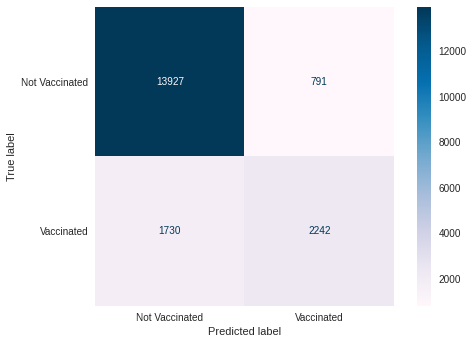

In [49]:
#Confusion matrix
def confusion_matrix(model,X_val,y_val):
    plot_confusion_matrix(model,X_val,y_val,
                        cmap=plt.cm.PuBu,
                        display_labels=['Not Vaccinated','Vaccinated'])
    plt.grid(False)


confusion_matrix(base,train_scaled,y_train)    

Now I will build other models to improve the accuracy and reduce the log_loss 

Since the target variable was imbalanced I will apply Synthetic Minority Oversampling(SMOTE)

#### Model 2(Logistic regression with SMOTE)

In [50]:
#SMOTE

# Previous original class distribution
print(y_train.value_counts()) 

#Instantiate SMOTE
sm = SMOTE(random_state=42)

# Fit SMOTE to training data
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train) 

# Preview synthetic sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts()) 


0    14718
1     3972
Name: h1n1_vaccine, dtype: int64


0    14718
1    14718
Name: h1n1_vaccine, dtype: int64


In [51]:
# Fit a log model on the resampled set
sm_log = LogisticRegression(random_state=42)

sm_log.fit(X_train_resampled, y_train_resampled)


print("sm Log Train scores:{}".format(cross_val(sm_log,X_train_resampled, y_train_resampled)) )  
print("sm Log Test scores:{}".format(cross_val(sm_log,X_test, y_test)) ) 


#Getting the recall of the model
smLog_pred = sm_log.predict(X_test)
smLog_recall = recall_score(y_test,smLog_pred)
print("SM Log recall:{}".format(smLog_recall ))






sm Log Train scores:(0.7925686652517336, 0.456681042611101)
sm Log Test scores:(0.8618145751995906, 0.3322585524462346)
SM Log recall:0.7438307873090482


In [52]:
print(classification_report(y_test,smLog_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.85      6309
           1       0.50      0.74      0.60      1702

    accuracy                           0.79      8011
   macro avg       0.71      0.77      0.73      8011
weighted avg       0.83      0.79      0.80      8011



The log model with SMOTE has better accuracy on both the train and test data,but an increase in log loss score and an increase recall

Next I will implement decision trees 

#### Model 3(Desicion Trees)

In [53]:
#Instantiate
DT = DecisionTreeClassifier(random_state = 42)

DT.fit(X_train, y_train)


print("DT Train scores:{}".format(cross_val(DT,X_train, y_train)) )  
print("DT Train scores:{}".format(cross_val(DT,X_test, y_test)) )  

#Getting the recall of the model
DT_pred = DT.predict(X_test)
DT_recall = recall_score(y_test,DT_pred)
print("DT recall:{}".format(DT_recall ))


DT Train scores:(0.7928838951310861, 7.1536252216688085)
DT Train scores:(0.7952813194361694, 7.070818171630227)
DT recall:0.5628672150411281


Decision tree scores have dropped from the previous models,but we dont seem to be overfitting

The log loss has greatly increased from 0.32 to 7.5,though the recall has also reduced from the log with resampled data

#### Model4( Decision Tree with SMOTE)

In [54]:
# Fit a log model on the resampled set
sm_DT = DecisionTreeClassifier(random_state=42)

sm_DT.fit(X_train_resampled, y_train_resampled)


print("sm DT Train scores:{}".format(cross_val(sm_DT,X_train_resampled, y_train_resampled)) ) 
print("sm DT test scores:{}".format(cross_val(sm_DT,X_test, y_test)) ) 


#Getting the recall of the model
smDT_pred = sm_DT.predict(X_test)
smDT_recall = recall_score(y_test,smDT_pred)
print("SM DT recall:{}".format(smDT_recall ))


sm DT Train scores:(0.8086378954919093, 6.606066615641969)
sm DT test scores:(0.7952813194361694, 7.070818171630227)
SM DT recall:0.6098707403055229


Model 4 performs slightly well on the training data but reduced accuracy on the testdata

Also the logloss is still high compared to the baseline model,although the recall has increased

#### Model 5 (Desicion Trees with gridsearch CV)

In [55]:

clf = DecisionTreeClassifier(random_state = 42)

# Defining params
param_grid = {'criterion': ['gini', 'entropy'],
            'max_features': ['auto', 'sqrt', 'log2', 5, 10, 30],
            'max_depth': [2, 8, 16, 32, 64, 128],
            'min_samples_split': [1,2,4,8,16,24],
            'min_samples_leaf': [1,2,5,10,15,30]}
gs_tree = GridSearchCV(clf, param_grid, cv=3,return_train_score = True,scoring = 'recall')
gs_tree.fit(X_train, y_train)

gs_tree.best_params_

          


{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 30,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [56]:
#Building a desicing tree model with the best params from gridsearch
grid_DT = DecisionTreeClassifier(random_state = 42,criterion= 'gini',
                            max_depth  = 8,
                            max_features = 30,
                            min_samples_leaf = 10,
                            min_samples_split = 2)

grid_DT.fit(X_train_resampled, y_train_resampled)


print("DT Train scores:{}".format(cross_val(grid_DT,X_train_resampled, y_train_resampled)) )  
print("DT Train scores:{}".format(cross_val(grid_DT,X_test, y_test)) ) 


#Getting the recall of the model
grid_DT_pred = grid_DT.predict(X_test)
grid_DT_recall = recall_score(y_test,grid_DT_pred)
print("grid_DT recall:{}".format(grid_DT_recall ))



DT Train scores:(0.7805751296149955, 0.5610766325519622)
DT Train scores:(0.8543257297685442, 0.7818791757723963)
grid_DT recall:0.7685076380728555


In [57]:
accuracy_score(y_test,grid_DT_pred)

0.7837972787417301

In [58]:
print(classification_report(y_test,grid_DT_pred ))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      6309
           1       0.49      0.77      0.60      1702

    accuracy                           0.78      8011
   macro avg       0.71      0.78      0.73      8011
weighted avg       0.83      0.78      0.80      8011



In [59]:

np.unique(grid_DT_pred,return_counts=True)

(array([0, 1]), array([5365, 2646]))

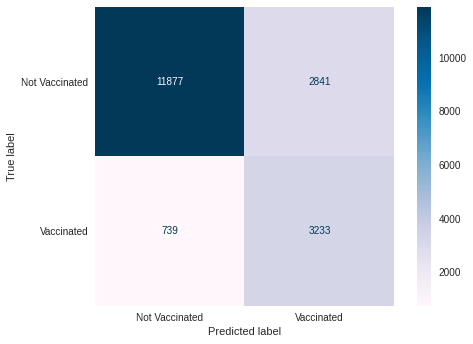

In [60]:
#Confusion matrix
confusion_matrix(grid_DT,X_train,y_train)

Gridserach cv on the desicion tress has improved the accuracy scores from the previous desicion tree models,there also doesnt seem to be over fitting,but still the baseline model gives the best scores so far



#### model6(Decision tree with optimal parameters from greed search and the resampled data set)

In [61]:
#Decision tree with best parameters with resampled set
grid_DT_sm = DecisionTreeClassifier(random_state = 42,criterion = 'gini',
                            max_depth  = 8,
                            max_features = 10,
                            min_samples_leaf = 30,
                            min_samples_split = 2)

grid_DT_sm.fit(X_train_resampled, y_train_resampled)


print("grid_DT_sm Train scores:{}".format(cross_val(grid_DT_sm,X_train_resampled, y_train_resampled)) )  
print("grid_DT_sm Train scores:{}".format(cross_val(grid_DT_sm,X_test, y_test)) )  

#Getting the recall of the model
grid_DT_sm_pred = grid_DT_sm.predict(X_test)
grid_DT_sm_recall = recall_score(y_test,grid_DT_sm_pred )
print("grid_DT_sm recall:{}".format(grid_DT_sm_recall ))



grid_DT_sm Train scores:(0.7632160443792882, 0.5241349259088597)
grid_DT_sm Train scores:(0.8490832186529159, 0.4813816521973656)
grid_DT_sm recall:0.782608695652174


In [62]:
print(classification_report(y_test,grid_DT_sm_pred))

              precision    recall  f1-score   support

           0       0.93      0.76      0.83      6309
           1       0.46      0.78      0.58      1702

    accuracy                           0.76      8011
   macro avg       0.70      0.77      0.71      8011
weighted avg       0.83      0.76      0.78      8011



The recall has greatly increased,and the log loss has also reduced from the previous decision tree models

In [63]:

np.unique(grid_DT_sm_pred,return_counts=True)

(array([0, 1]), array([5140, 2871]))

#### Random Forest

In [64]:
#Baseline random forest
rf = RandomForestClassifier(random_state=42)

rf.fit(train_scaled, y_train)


print("rf Train scores:{}".format(cross_val(rf,train_scaled, y_train)) )  
print("rf Train scores:{}".format(cross_val(rf,test_scaled, y_test) ) )



#Getting the recall of the model
rf_pred= rf.predict(test_scaled)
rf_recall = recall_score(y_test,rf_pred)
print("rf_recall:{}".format(rf_recall ))


rf Train scores:(0.8641519529159979, 0.3503599642706369)
rf Train scores:(0.8605666809189698, 0.36409269542522604)
rf_recall:0.5058754406580493


In [65]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6309
           1       0.76      0.51      0.61      1702

    accuracy                           0.86      8011
   macro avg       0.82      0.73      0.76      8011
weighted avg       0.85      0.86      0.85      8011



In [66]:
accuracy_score(y_test,rf_pred)

0.8608163774809636

The recall score has really reduced,though the accuracy score has increased

In [84]:
#random forest with resampled set
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train_resampled, y_train_resampled)

#Getting accuracy and log loss on train and test data
print("rf Train scores:{}".format(cross_val(rf,X_train_resampled, y_train_resampled)) )  
print("rf Train scores:{}".format(cross_val(rf,X_test, y_test) ) )


#Getting the recall of the model
rf_pred= rf.predict(X_test)
rf_recall = recall_score(y_test,rf_pred)
print("rf_recall:{}".format(rf_recall ))


rf Train scores:(0.8837153217572247, 0.3101250556432819)
rf Train scores:(0.8600673830201332, 0.36423232425944957)
rf_recall:0.6750881316098707


In [68]:
recall_score(y_test,rf_pred)

0.6750881316098707

In [69]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      6309
           1       0.62      0.68      0.64      1702

    accuracy                           0.84      8011
   macro avg       0.76      0.78      0.77      8011
weighted avg       0.85      0.84      0.84      8011



Random forest with smote has better scores,and a reduced log loss

* Random forest has significantly better results than the decision tree models ,even an increase in the recall score

* Lets try to tune it using grid search

In [70]:
#Defining parameters for grid search with random forest
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

#Instantiating a grid search
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5,scoring = "recall")
rf_grid_search.fit(X_train, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")


Training Accuracy: 0.5178781109896551

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 30}


In [71]:
# RAndom forest with the best features from the grid search with resampled set
forest = RandomForestClassifier(random_state=42,criterion ='entropy',
                             min_samples_leaf = 3, min_samples_split = 5, n_estimators = 30)

forest.fit(X_train_resampled, y_train_resampled)



#Score on the train and test set
print("rf Train scores:{}".format(cross_val(forest,X_train_resampled, y_train_resampled)) ) 
print("rf Test scores:{}".format(cross_val(forest,X_test, y_test)) )


#Getting the recall of the model
forest_pred= forest.predict(X_test)
forest_recall= recall_score(y_test,forest_pred)
print("forest recall:{}".format(forest_recall ))


rf Train scores:(0.8543631336271519, 0.36467937029289715)
rf Test scores:(0.8600677724273229, 0.3590058705414794)
forest recall:0.7115158636897767


The model seems to be performing well on training and test data,although the log loss on test data has reduced

Also an increased in recall

In [72]:
print(classification_report(y_test,forest_pred,target_names=['not vaccinated','vaccinated'] ))

                precision    recall  f1-score   support

not vaccinated       0.92      0.86      0.89      6309
    vaccinated       0.57      0.71      0.63      1702

      accuracy                           0.83      8011
     macro avg       0.74      0.78      0.76      8011
  weighted avg       0.84      0.83      0.83      8011



## XGboost

In [74]:
XG = XGBClassifier()
XG.fit(X_train_resampled, y_train_resampled)



#Score on the train test
print("rf Train scores:{}".format(cross_val(XG,X_train_resampled, y_train_resampled)) ) 

#Scores on the test data
print("rf Train scores:{}".format(cross_val(XG,X_test, y_test)) ) 

#Getting the recall of the model
XG_pred= XG.predict(X_test)
XG_recall= recall_score(y_test,XG_pred)
print("forest recall:{}".format(XG_recall ))


[19:31:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:31:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:31:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:31:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [75]:
print(classification_report(y_test,XG_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      6309
           1       0.56      0.68      0.62      1702

    accuracy                           0.82      8011
   macro avg       0.74      0.77      0.75      8011
weighted avg       0.84      0.82      0.83      8011



In [76]:
# XGB classifier with tuned parameters
XGB= XGBClassifier(learning_rate= 0.2,
max_depth=4,
min_child_weight= 1,
n_estimators= 50,
subsample= 0.6)
XGB.fit(train_scaled, y_train)



#Score on the train test
print("XGB Train scores:{}".format(cross_val(XGB,train_scaled, y_train)) ) 

#Scores on the test data
print("XGB Test_score:{}".format(cross_val(XGB,test_scaled, y_test)) )

#Getting the recall of the model
XGB_pred= XGB.predict(test_scaled)
XGB_recall= recall_score(y_test,XGB_pred)
print("forest recall:{}".format(XGB_recall ))

[19:31:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:31:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:31:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:31:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [85]:
#classification report for the XGboost classifier with tuned parameters
print(classification_report(y_test,XGB_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6309
           1       0.75      0.58      0.65      1702

    accuracy                           0.87      8011
   macro avg       0.82      0.76      0.78      8011
weighted avg       0.86      0.87      0.86      8011



XGB Boost with tuned parameters has slight improvement from the baseline model.

The log loss on both train and test data has reduced.

There is an increase in accuracy,recall and precision

This will be my final model

### Evaluation

The final model(XGBoost with tuned parameters) has a slightly better scores than the baseline ogistic model

In [77]:
XGB_pred= XGB.predict(test_scaled)

In [78]:
#Getting the scores of the two model in order to compare
#Evaluating the logloss on test data
base_log_loss = 0.3322923752347796
final_log_loss = 0.3244741434788242
print("baseline log loss:{}".format(base_log_loss))
print("final log loss:{}".format(final_log_loss))
print("\n")

#Classification report of the base model
print("Base model report")
print(classification_report(y_test,base_pred))
print("\n")

#Classification report of the finalmodel
print("Final model report")
print(classification_report(y_test,XGB_pred))





baseline log loss:0.3322923752347796
final log loss:0.3244741434788242


Base model report
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6309
           1       0.73      0.56      0.63      1702

    accuracy                           0.86      8011
   macro avg       0.81      0.75      0.78      8011
weighted avg       0.86      0.86      0.86      8011



Final model report
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6309
           1       0.75      0.58      0.65      1702

    accuracy                           0.87      8011
   macro avg       0.82      0.76      0.78      8011
weighted avg       0.86      0.87      0.86      8011



The log loss has slightly reduced from 0.3322 to 0.3244

#### Interpretation of the final model

In [79]:
#Feature importance 0f the final model
Feature_importance=pd.DataFrame({'Features':np.array(X_train.columns),'Importance':XGB.feature_importances_*100 })
Feature_importance = Feature_importance.sort_values(by='Importance', ascending=False)
Feature_importance


,Features,Importance
32,seasonal_vaccine,23.748919
9,doctor_recc_h1n1,18.331568
14,health_insurance,6.324111
16,opinion_h1n1_risk,5.052660
15,opinion_h1n1_vacc_effective,4.396277
10,doctor_recc_seasonal,4.184683
13,health_worker,3.866113
1,h1n1_knowledge,1.704187
18,opinion_seas_vacc_effective,1.683596
5,behavioral_wash_hands,1.550153


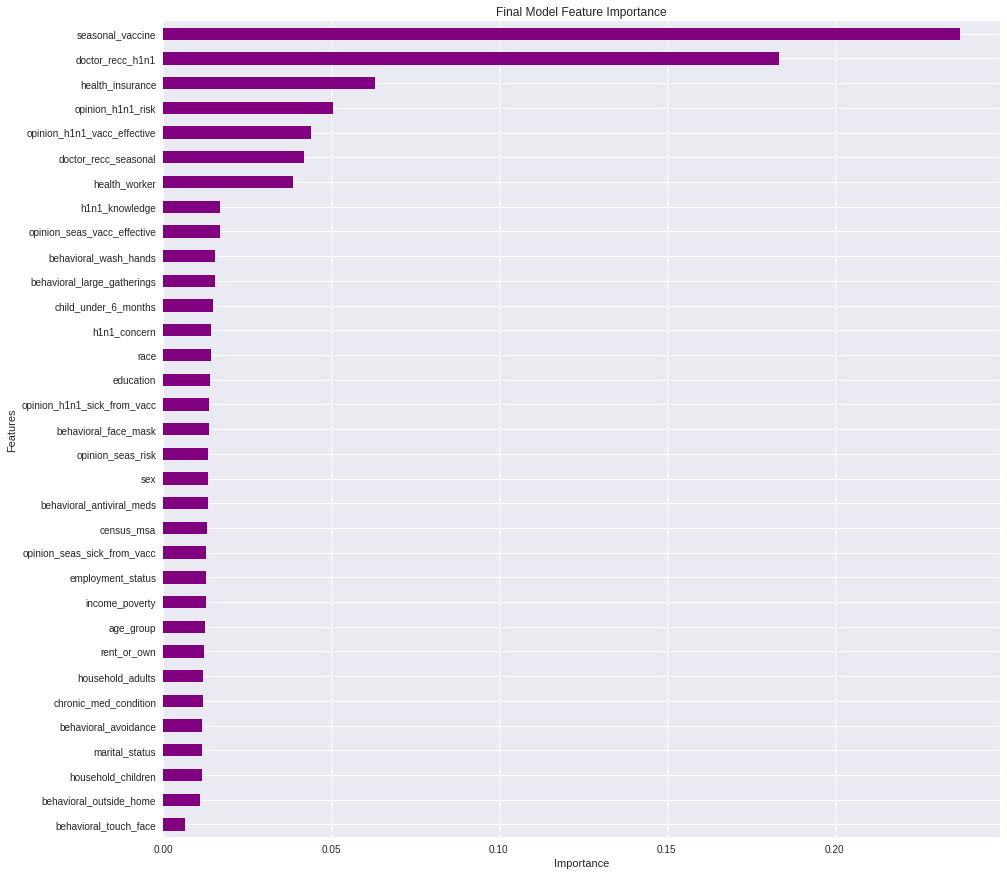

In [80]:
feats = pd.Series(XGB.feature_importances_, index = X_train.columns)
# Sort values
feats = feats.sort_values(ascending = True)
# Drop null values
feats = feats[feats != 0]
# Plot bar plot
feats.plot(kind = 'barh', figsize = (15,15),color = 'purple')
plt.title('Final Model Feature Importance')
plt.xlabel('Importance')
plt.ylabel("Features")
plt.show()

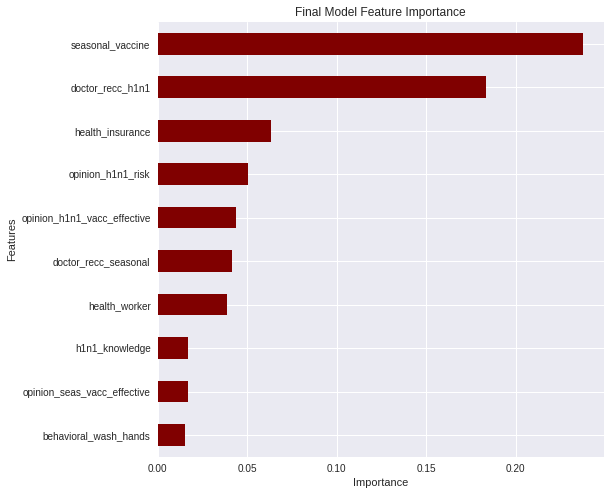

In [87]:
#Plot top ten most important features
feats[-10:].plot(kind = 'barh', figsize = (8,8),color = "maroon")
plt.title('Final Model Feature Importance')
plt.xlabel('Importance')
plt.ylabel("Features")
plt.savefig('feature importance', bbox_inches = "tight")
plt.show()

The model shows that the most importance features to predict whether a person would take the h1n1 vaccine was 
* Whether they received the seasonal vaccine or not
* Whether the doctor recomended them to take the vaccine
* Whether the have health inurance
* Whether they received they were at risk of being infected
* Whether they believed the vaccine was effective

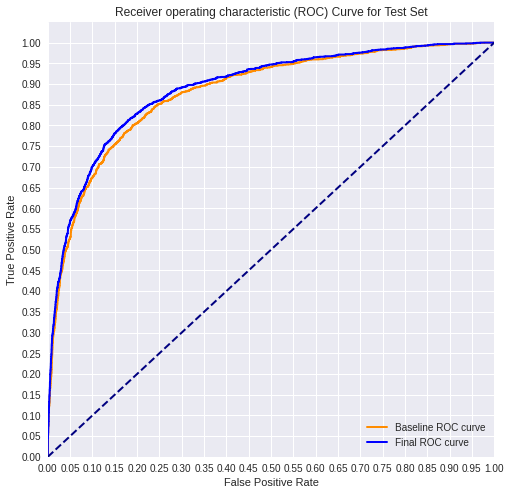

In [90]:
#Roc curve for both the models on test data
# Calculate the probability scores of each point in the testing set for the baseline model
base_score = base.predict_proba(test_scaled)[:,1]

# Calculate the fpr, tpr, and thresholds for the testing set for the baseline model
base_fpr, base_tpr, thresholds = roc_curve(y_test, base_score)

# Calculate the probability scores of each point in the testing set for the final model
final_score = XGB.predict_proba(test_scaled)[:,1]

# Calculate the fpr, tpr, and thresholds for the testing set for the final model
final_fpr, final_tpr, thresholds = roc_curve(y_test, final_score)


plt.figure(figsize=(8, 8))
lw = 2
plt.plot(base_fpr, base_tpr, color='darkorange',
         lw=lw, label='Baseline ROC curve')
plt.plot(final_fpr, final_tpr, color='blue',
         lw=lw, label='Final ROC curve')         
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc='lower right')
plt.savefig("ROC curve.png")
plt.show()

The roc_curves shows a slight improvement from the baseline model 

In [83]:
#Classification report of the finalmodel
print("Final model report")
print(classification_report(y_test,XGB_pred))


Final model report
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6309
           1       0.75      0.58      0.65      1702

    accuracy                           0.87      8011
   macro avg       0.82      0.76      0.78      8011
weighted avg       0.86      0.87      0.86      8011



From the above report:

* The models' accuracy increased from 0.86 to 0.87 meaning that the model correctly assigns whether a person has taken h1n1 vaccine or not 87% of the time.

* The models' recall increased from 0.56 to 0.58 meaning that if a person has takem the vaccine there is 58% chance that the model will show that the person has taken the vaccine

* The models' precision increased from 0.73 to 0.75 meaning that if the model shows that a person has taken the vaccine there is 75% chance that indeed he has taken the vaccine


### Conclusions

* Most people had very little knowledge on the h1n1 flu.

* Those people who received the seasonal vaccine were most likely to receive the h1n1 vaccine.

* Those people who the doctors reccommend to take the vaccine were most likely to take the vaccine

* Those people who had health insurance were most like to take the vaccine

### Limitations

* Some columns(employment occupation,employment industry) had more than 50% of the data missing leading to droping the columns,data collection process can improved to see that we dont have large percentage of missing values

* Some columns(employment occupation,employment industry,hhs_geo_region) had values that were not understandable,since they were represented with random character strings which were had to understand the meaning

* Supplementary data analysis.We can explore the motivation for and against seasonal vaccination and make an inference on the variable which have greatest influence. This is because seasonal vaccination is a good predictor of H1N1 vaccination, and data would be more readily available,



### Reccomendations

* The minstry of health should invest in ensuring that people have good understanding of a disease and why they need to be vaccinated.Since those who even had a little knowledge on the flu took the vaccine

* They should also not only talk about the disease but also ensure they explain how efective the vaccine is,and how it works to clear any doubts

* Doctors should encourage the uptake of vaccine as patients visit them.

* The ministry of health should also emphasize on the importance of taking health insurance and put in policies to make it affordable for people to get.